In [1]:
#varables: 0 means no change on result, 1 mean change on result
var1 <- c(1, rep(0, times = 25), rep(1, times = 18), rep(0, times = 17))
#group: S mean in same region, D means in different region
group1 <- c(rep('S', times = 26), rep('D', times = 35))

In [2]:
same <- aggregate(x = var1, by = list(group1), FUN = mean)

In [3]:
#orginial sample difference
diff1 <- same[1,2] - same[2,2]
diff1

[1] 0.4907407

In [4]:
# number of samples
set.seed(7)
NSample <- 10000
ResultD <- rep(0, NSample)
# the loop for averge diff
for (i in 1:NSample) {
    # shuffle the variable
    var2 <- sample(var1, length(var1), replace = FALSE)
    group2 <- sample(group1, length(group1), replace = FALSE)
    # calculate the diff
    res <- aggregate(x = var2, by = list(group2), FUN = mean)
    diff <- res[1,2] - res[2,2]
    ResultD[i] <- diff
}

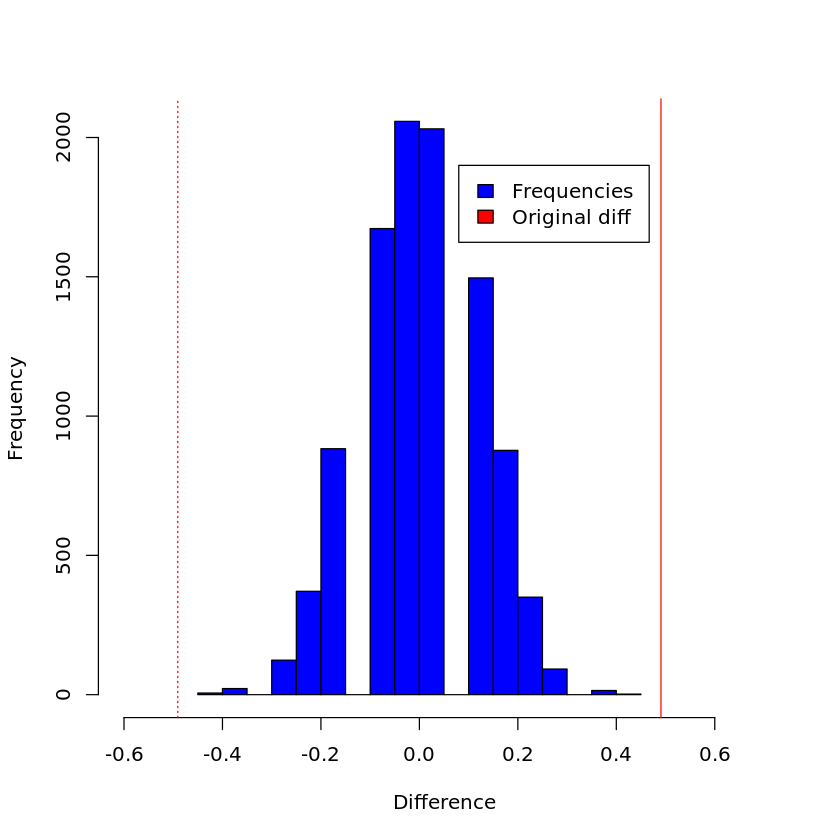

In [5]:
hist(ResultD, xlab = 'Difference',col = "blue", xlim = range(-0.6,0.7), main = "")
abline(v = diff1, col = "red")
abline(v = -diff1, col = "red", lty = 3)
legend(x = .08 ,y =1900, c("Frequencies", "Original diff"), fill=c("blue", "red"))

In [6]:
count <- 0
for (val in ResultD) {
    if(val <= -diff1 || val >= diff1)
        count = count+1
}
P_value <- count/NSample
P_value

[1] 0